# A sort of random walk in a rectangular grid

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.linalg import svd

In [54]:
# The walker remains inside the grid
cond = lambda x : (x>= 0) and (x<  size) 


Entries considered in a previous move cannot be considered in future steps. It means, the walker must stop. Obviouly, the number of steps is smaller than the size of the grid. Statiscally, it happens to be much smaller than that. We call the number of steps the living time of the walker.   

In [55]:
def neigh(entry, mtx):
    i, j = entry[0], entry[1]
    poolB = [(i-1,j), (i+1, j), (i, j-1), (i, j+1)]
    pool = [q for  q in poolB if cond(q[0]) and cond(q[1]) and mtx[q[0], q[1]]== 0 ]
    return pool    

In [70]:
size = 300
def matrixConstructor():
    mtx = np.reshape(np.zeros(size*size), (size,size))
    p = (random.choice(range(size)),  random.choice(range(size)))
    mtx[p] = 1
    counter = 1
    while len(neigh(p, mtx))>0:
        pool = neigh(p, mtx)
        for q in pool: mtx[q]= -1
        q = random.choice(pool)
        mtx[q] = 1
        p = q
        counter += 1
    return (mtx, counter)

In [71]:
mtx, steps = matrixConstructor() 
steps

214

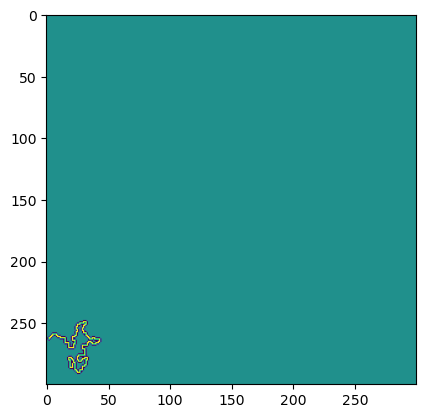

In [72]:
plt.imshow(mtx)

## Walker's expected living time

In [76]:
samplingSize = 20000
lvnT = []
for k in range(samplingSize): lvnT.append(matrixConstructor()[1])

In [77]:
(np.mean(lvnT), np.std(lvnT))

(103.6082, 71.6397319422679)

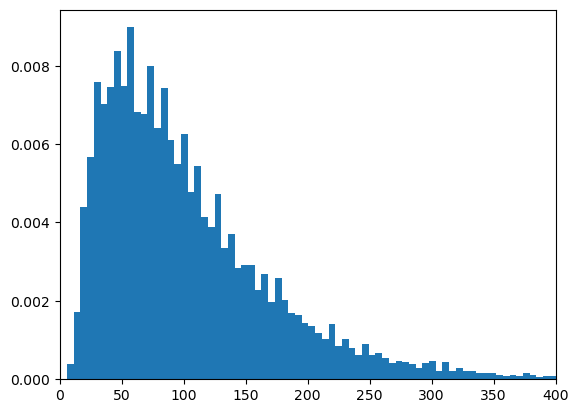

In [79]:
plt.hist(lvnT,bins = 150, density=True)
plt.xlim(0, 400)
#plt.grid(True)
plt.show()

## Expected eigenvalues of the resulting matrix

In [80]:
def samplingEV():
    samplingSize = 50000
    B= matrixConstructor()[0]
    A = np.matmul(B, np.transpose(B))
    U, s, VT = svd(A)
    evs = s
    for k in range(samplingSize-1):
        B= matrixConstructor()[0]
        A = np.matmul(B, np.transpose(B))
        U, s, VT = svd(A)
        evs = np.append(evs, s)
    
    eigenvalues = []
    for j in range(size):
        ev = evs[j: size*samplingSize:size]
        z = np.mean(ev)
        eigenvalues.append(z)
        
    return np.array(eigenvalues)

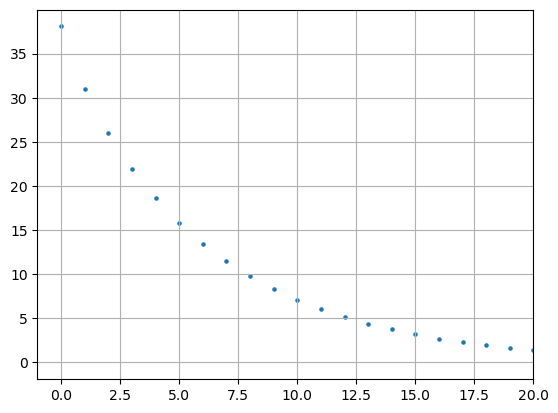

[38.06846041 31.03668953 25.9697737  21.91911745 18.60720446]
2.028603647389451e-15


In [81]:
eigenvalues = samplingEV()

xx = range(len(eigenvalues))
plt.scatter(xx, eigenvalues, s = 5.1)
plt.xlim(-1, 20)
plt.grid(True)
plt.show()

print(eigenvalues[:5])
print(eigenvalues[-1])